In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
Data = pd.read_csv('D:/Class work/Fall 2021/DAEN 690/Assignments/combPeopledfCheck750000.csv')

C:\Users\amarp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Data = Data.sample(frac = 1)
print(Data)

        ApplicantID [I130]PeopleNamePetitioner [I130A]PeopleNameBeneficiary  \
206188      2406188               Felicia King                  Craig White   
630865      1130865            Rebecca Russell                   Jodi Fritz   
477032      2927032               Andrea Munoz                 Linda Garcia   
259398      2509398               Kelly Rangel                  Erica Moore   
689257      1239257        Christopher Bennett                Gary Campbell   
...             ...                        ...                          ...   
4083        2004083              Jeffrey Woods              Elaine Crawford   
114835      2214835                Brandy Hill                  Amy Mendoza   
397043      2747043               Megan Osborn               Jennifer Evans   
322136      2622136                 Leroy Haas                Michael Jones   
53943       2103943                Alex Palmer            Alexandria Taylor   

       [I130]DOBPetitioner [I130]MailingStateFiling

In [4]:
def federalpovertyline(x,y):
    if x >= y:
        return 'Yes'
    else:
        return 'No'

In [5]:
Data['[CALCULATED]IncomeAboveFederalPovertyLine']= Data.apply(lambda x: federalpovertyline(x["[CALCULATED]TotalIncome"], x["[CALCULATED]FederalPovertyLineValue"]), axis=1)

In [6]:
def TotalYearsFromLastMarriageCategoricalFn(x):
    if x >= 2:
        a="2 or More Years"
    elif x < 2:
        a="Less than 2 Years"
    else:
        a="Green"
    
    return a

In [7]:
Data['[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical'] =  Data['[CALCULATED]TotalYearsFromLastMarriagePetitioner'].apply(lambda x: TotalYearsFromLastMarriageCategoricalFn(x))

In [8]:
Data['[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical'] =  Data['[CALCULATED]TotalYearsFromLastMarriageBeneficiary'].apply(lambda x: TotalYearsFromLastMarriageCategoricalFn(x))

In [9]:
Data['[CALCULATED]IncomeAboveFederalPovertyLine'].value_counts()

Yes    707708
No      42292
Name: [CALCULATED]IncomeAboveFederalPovertyLine, dtype: int64

In [10]:
def Fraud(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [11]:
Data['[Calculated]FraudLikelihoodnumeric']= Data['[Calculated]FraudLikelihood'].apply(lambda x: Fraud(x))

In [12]:
Data['[Calculated]FraudLikelihoodnumeric'].value_counts()

0    434518
1    315482
Name: [Calculated]FraudLikelihoodnumeric, dtype: int64

In [13]:
Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].fillna("Green",inplace = True)

In [14]:
Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'].fillna("Green",inplace = True)

In [15]:
Data['[I130]PreviousFiledPetitionerSameSpouseRejectionCondition'].value_counts()

Green               719961
Minor Reasons        15053
Moderate Reasons     10425
Major Reasons         4561
Name: [I130]PreviousFiledPetitionerSameSpouseRejectionCondition, dtype: int64

In [16]:
Data['[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition'].value_counts()

Green               710039
Minor Reasons        20001
Moderate Reasons     13947
Major Reasons         6013
Name: [I130]PreviousPetitionFiledDifferentSpouseRejectionCondition, dtype: int64

In [17]:
def CriminalityProvedConvictedTypeFn(x):
    if x == "Major Reasons" or x == "Minor Reasons":
        a = x
    else:
        a = "Green"
        
    return a

In [18]:
Data['[I485]CriminalityProvedConvictedTypeN'] =  Data['[I485]CriminalityProvedConvictedType'].apply(lambda x: CriminalityProvedConvictedTypeFn(x))

In [19]:
Data['[I485]CriminalityProvedConvictedTypeN'].value_counts()

Green            714494
Minor Reasons     26540
Major Reasons      8966
Name: [I485]CriminalityProvedConvictedTypeN, dtype: int64

In [20]:
def Agegapfn(x):
    if x >= 15:
        return "red"
    elif x<15 and x>9:
        return "Yellow"
    else:
        return "Green"
        

In [21]:
Data['[CALCULATED]AgeGapYears_Cat'] =  Data['[CALCULATED]AgeGapYears'].apply(lambda x: Agegapfn(x))

In [22]:
Data['[CALCULATED]AgeGapYears_Cat'].value_counts() 

Green     635349
red        79284
Yellow     35367
Name: [CALCULATED]AgeGapYears_Cat, dtype: int64

In [23]:
def RedGreenYellow(x):
    if x == 'Green':
        return 0
    elif x == "Yellow":
        return 1
    else:
        return 2

In [24]:
Data['[Calculated]FlagType'] = Data['[Calculated]FlagType'].apply(lambda x: RedGreenYellow(x))

In [25]:
Data['[Calculated]FlagType'].value_counts()

0    434518
2    222642
1     92840
Name: [Calculated]FlagType, dtype: int64

In [26]:
X = Data[['[I130]StayingTogetherStatus','[I130]CurrentMaritalStatus','[I485-130]SameEmployer','[I130]ImmigrationProceeding',
         '[I130A]BeneficiaryInUS','[I130-MarriageCertificate]SamePreparorNoterMinister','[CALCULATED]AgeGapYears_Cat','[I130]NumberOfMarriagesPetitioner',
         '[I130]NumberOfMarriagesBeneficiary','[I485]CriminalityProvedConvictedTypeN','[I130]PreviousFiledPetitionerSameSpouseRejectionCondition',
         '[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition','[CALCULATED]IncomeAboveFederalPovertyLine','[I864]FederalTaxFiledYears',
         '[CALCULATED]LengthOfMarriage','[CALCULATED]DiffEntryDateAndMarriageDate','[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical',
         '[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical']]

In [27]:
dummylist = ['[I130]StayingTogetherStatus','[I130]CurrentMaritalStatus','[I485-130]SameEmployer','[I130]ImmigrationProceeding',
            '[I130A]BeneficiaryInUS','[I130-MarriageCertificate]SamePreparorNoterMinister','[I485]CriminalityProvedConvictedTypeN',
            '[I130]PreviousFiledPetitionerSameSpouseRejectionCondition','[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition',
            '[CALCULATED]IncomeAboveFederalPovertyLine','[I864]FederalTaxFiledYears','[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical',
            '[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical','[CALCULATED]AgeGapYears_Cat']

In [28]:
def dummy(Data,dummylist):
    for X in dummylist:
        dummies = pd.get_dummies(Data[X], prefix=X, dummy_na=False)
        Data = Data.drop(X,1)
        Data = pd.concat([Data, dummies],axis = 1)
    return Data 

In [29]:
X = dummy(X , dummylist)

In [30]:
datacorr = X.corr().abs()

In [31]:
upper = datacorr.where(np.triu(np.ones(datacorr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-31-af5c9e6a0792>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = datacorr.where(np.triu(np.ones(datacorr.shape), k=1).astype(np.bool))


In [32]:
X = X.drop(X[to_drop], axis=1)

In [33]:
Y = Data[['[Calculated]FlagType']]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)

In [ ]:
# rbf_pred = rbf.predict(X_test)

In [40]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='none')

In [41]:
log_model = model.fit(X_train, y_train)

C:\Users\amarp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\amarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
y_predict_proba = model.predict_proba(X_test)

In [43]:
y_predict = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, y_predict)
M

array([[86310,     0,   789],
       [ 3448, 14044,  1153],
       [ 4186,  2036, 38034]], dtype=int64)

In [46]:
pd.DataFrame(M,index=['Green','Yellow','Red'], columns =['Predicted_Green','Predicted_yellow','Predicted_Red'])

,Predicted_Green,Predicted_yellow,Predicted_Red
Green,86310,0,789
Yellow,3448,14044,1153
Red,4186,2036,38034


In [47]:
Class_report = classification_report(y_test,y_predict)
print(Class_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87099
           1       0.87      0.75      0.81     18645
           2       0.95      0.86      0.90     44256

    accuracy                           0.92    150000
   macro avg       0.91      0.87      0.89    150000
weighted avg       0.92      0.92      0.92    150000



In [58]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_predict_proba[:,i], pos_label=i)

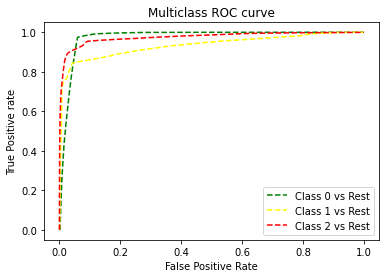

In [61]:
import matplotlib.pyplot as plt
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);